# SEIR model



This model package original from MIT

source here:

https://pypi.org/project/SEIR/

Documentation:

https://seir.readthedocs.io/en/latest/

# Test running

In [9]:
import SEIR
import numpy as np

In [2]:
SEIR

<module 'SEIR' from 'D:\\Anaconda\\envs\\tf\\lib\\site-packages\\SEIR\\__init__.py'>

when you successfully load SEIR package, you need to manually rewrite its initiation file. Follow the model location to find the initiation file and add below code in the top of the file:

~~~~~~~~~~~
"""Top-level package for SEIR."""
from .seir import *
from .cli import *
from .visualization import *
from .parser import *
~~~~~~~~~~~

After you doing that, close the jupyter notebook and its server, and re-open it. Then you can run the following code.

In [3]:
dir(SEIR)

['Any',
 'Callable',
 'Dict',
 'EngFormatter',
 'GridSpec',
 'GridSpecFromSubplotSpec',
 'List',
 'Optional',
 'SEIR',
 'Text',
 'Union',
 'WD',
 '__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__email__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'cli',
 'click',
 'cm',
 'config_file_parser',
 'cumtrapz',
 'itertools',
 'main',
 'np',
 'os',
 'parse_config_ini',
 'parser',
 'pd',
 'plt',
 'restrictions_section_parser',
 'seir',
 'solve_ivp',
 'sys',
 'trapz',
 'visualization',
 'visualize_seir_computation']

In [4]:
import numpy as np
path = r"C:\Users\MORPH\DataSciCov\model_configs\finland_with_restrictions"

In [5]:

    kwargs, initial_state_kwargs, sim_kwargs, restr_info = SEIR.parse_config_ini(path)

    model = SEIR.SEIR(**kwargs)

    # Setup initial state
    model.set_initial_state(**initial_state_kwargs)

    # Simulate up to 200 days
    model.simulate(**sim_kwargs)

    # Evaluate the solution
    time = np.arange(0, sim_kwargs['max_simulation_time'], 1, dtype=int)
    results = model.evaluate_solution(time)

 

In [6]:
initial_state_kwargs

{'probabilities': False,
 'population_exposed': [0.084,
  0.084,
  0.252,
  0.336,
  0.588,
  0.756,
  0.84,
  0.924,
  0.84,
  0.756,
  0.588,
  0.336,
  0.252,
  0.084,
  0.084],
 'population_infected': [0.0,
  0.0,
  0.001,
  0.001,
  0.002,
  0.002,
  0.003,
  0.003,
  0.003,
  0.002,
  0.002,
  0.001,
  0.001,
  0.0,
  0.0]}

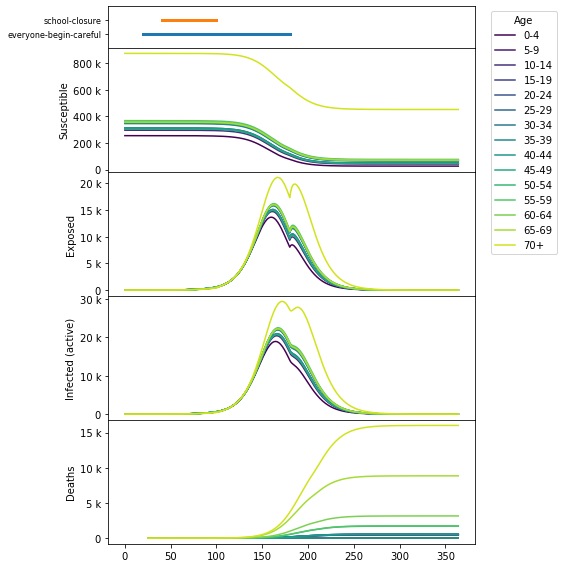

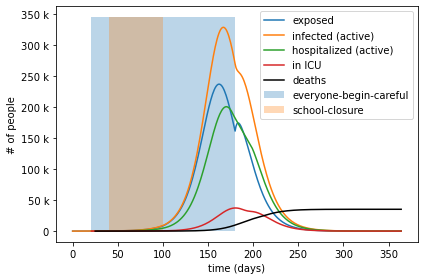

In [7]:


    # Visualize the results
    SEIR.visualize_seir_computation(
        results,
        compartments=kwargs['compartments'],
        restrictions_info=restr_info,
        show_individual_compartments=True)

In [8]:
output_file_format = 'csv'
output_file = r"C:\Users\MORPH\DataSciCov\model_configs\finland_with_restrictions_result.csv"

In [9]:
   # Save data
    if output_file_format == 'csv':
        output_file_local = output_file or os.path.basename(f'{config_file}.csv')
        results.to_csv(output_file)
    elif output_file_format == 'json':
        output_file_local = output_file or os.path.basename(f'{config_file}.json')
        results.to_json(output_file)

# Testing on Italy data

In this test, we parameter tuning the general policy like social distance and face masks protection strength.

We also parameter tuning the hospitalization probability, icu probability and death probability

incubation period and infection period we hypothesis them as 14 days and 3 days based on current numerious research.

Based on current evidence, we know the true begining of cov19 is somewhere in the early of 2020 January worldwide. Thus Italy simulation begin with Jan 1 with 330 days. https://www.globaltimes.cn/content/1197472.shtml

In [25]:
path = r"C:\Users\MORPH\DataSciCov\model_configs\Italy.txt"

In [26]:

    kwargs, initial_state_kwargs, sim_kwargs, restr_info = SEIR.parse_config_ini(path)

    model = SEIR.SEIR(**kwargs)

    # Setup initial state
    model.set_initial_state(**initial_state_kwargs)

    # Simulate up to 200 days
    model.simulate(**sim_kwargs)

    # Evaluate the solution
    time = np.arange(0, sim_kwargs['max_simulation_time'], 1, dtype=int)
    results = model.evaluate_solution(time)

 

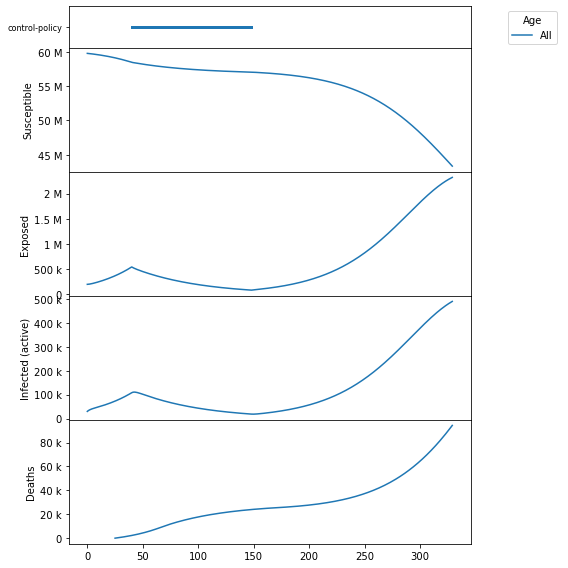

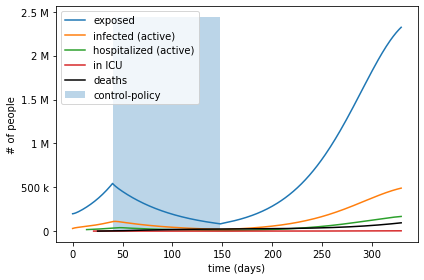

In [27]:
    # Visualize the results
    SEIR.visualize_seir_computation(
        results,
        compartments=kwargs['compartments'],
        restrictions_info=restr_info,
        show_individual_compartments=True)

In [28]:
output_file_format = 'csv'
output_file = r"C:\Users\MORPH\DataSciCov\model_configs\Italy.csv"

In [29]:
results

,time,"(susceptible, All)",susceptible,"(exposed, All)",exposed,"(infected (active), All)",infected (active),"(infected (total), All)",infected (total),"(removed, All)",removed,"(hospitalized (active), All)",hospitalized (active),"(in ICU, All)",in ICU,"(deaths, All)",deaths
0,0.0,5.977200e+07,5.977200e+07,1.980000e+05,1.980000e+05,30000.000000,30000.000000,3.000000e+04,3.000000e+04,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,5.975613e+07,5.975613e+07,1.996808e+05,1.996808e+05,33568.681574,33568.681574,4.420289e+04,4.420289e+04,1.062439e+04,1.062439e+04,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,5.973871e+07,5.973871e+07,2.027312e+05,2.027312e+05,36274.412432,36274.412432,5.857475e+04,5.857475e+04,2.228385e+04,2.228385e+04,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,5.972010e+07,5.972010e+07,2.067224e+05,2.067224e+05,38430.319758,38430.319758,7.319809e+04,7.319809e+04,3.474664e+04,3.474664e+04,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,5.970052e+07,5.970052e+07,2.113774e+05,2.113774e+05,40239.920036,40239.920036,8.813023e+04,8.813023e+04,4.786584e+04,4.786584e+04,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,325.0,4.404895e+07,4.404895e+07,2.275784e+06,2.275784e+06,478392.286419,478392.286419,1.367551e+07,1.367551e+07,1.319687e+07,1.319687e+07,162909.829205,162909.829205,3119.860208,3119.860208,89552.410507,89552.410507
326,326.0,4.387314e+07,4.387314e+07,2.288583e+06,2.288583e+06,481434.502036,481434.502036,1.383852e+07,1.383852e+07,1.335684e+07,1.335684e+07,164109.426321,164109.426321,3145.715622,3145.715622,90734.892371,90734.892371
327,327.0,4.369694e+07,4.369694e+07,2.300874e+06,2.300874e+06,484375.565561,484375.565561,1.400243e+07,1.400243e+07,1.351781e+07,1.351781e+07,165124.689851,165124.689851,3171.149104,3171.149104,91930.904949,91930.904949
328,328.0,4.352039e+07,4.352039e+07,2.312646e+06,2.312646e+06,487212.920641,487212.920641,1.416720e+07,1.416720e+07,1.367975e+07,1.367975e+07,166112.428642,166112.428642,3196.140342,3196.140342,93140.342683,93140.342683


In [30]:
import pandas as pd
import numpy as np
data_series = pd.date_range(start = '2020-03-08',end ="2020-04-19")

In [31]:
data_series.size

43

In [32]:
data_series = pd.date_range(start = '2020-03-08',periods = 330)
data_series_frame = pd.DataFrame(data_series)
data_series_frame = data_series_frame.rename(columns = {0:'date'}) 
results = pd.concat([results, data_series_frame], axis=1, join='outer')

In [33]:
results

,time,"(susceptible, All)",susceptible,"(exposed, All)",exposed,"(infected (active), All)",infected (active),"(infected (total), All)",infected (total),"(removed, All)",removed,"(hospitalized (active), All)",hospitalized (active),"(in ICU, All)",in ICU,"(deaths, All)",deaths,date
0,0.0,5.977200e+07,5.977200e+07,1.980000e+05,1.980000e+05,30000.000000,30000.000000,3.000000e+04,3.000000e+04,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-08
1,1.0,5.975613e+07,5.975613e+07,1.996808e+05,1.996808e+05,33568.681574,33568.681574,4.420289e+04,4.420289e+04,1.062439e+04,1.062439e+04,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-09
2,2.0,5.973871e+07,5.973871e+07,2.027312e+05,2.027312e+05,36274.412432,36274.412432,5.857475e+04,5.857475e+04,2.228385e+04,2.228385e+04,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-10
3,3.0,5.972010e+07,5.972010e+07,2.067224e+05,2.067224e+05,38430.319758,38430.319758,7.319809e+04,7.319809e+04,3.474664e+04,3.474664e+04,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-11
4,4.0,5.970052e+07,5.970052e+07,2.113774e+05,2.113774e+05,40239.920036,40239.920036,8.813023e+04,8.813023e+04,4.786584e+04,4.786584e+04,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,325.0,4.404895e+07,4.404895e+07,2.275784e+06,2.275784e+06,478392.286419,478392.286419,1.367551e+07,1.367551e+07,1.319687e+07,1.319687e+07,162909.829205,162909.829205,3119.860208,3119.860208,89552.410507,89552.410507,2021-01-27
326,326.0,4.387314e+07,4.387314e+07,2.288583e+06,2.288583e+06,481434.502036,481434.502036,1.383852e+07,1.383852e+07,1.335684e+07,1.335684e+07,164109.426321,164109.426321,3145.715622,3145.715622,90734.892371,90734.892371,2021-01-28
327,327.0,4.369694e+07,4.369694e+07,2.300874e+06,2.300874e+06,484375.565561,484375.565561,1.400243e+07,1.400243e+07,1.351781e+07,1.351781e+07,165124.689851,165124.689851,3171.149104,3171.149104,91930.904949,91930.904949,2021-01-29
328,328.0,4.352039e+07,4.352039e+07,2.312646e+06,2.312646e+06,487212.920641,487212.920641,1.416720e+07,1.416720e+07,1.367975e+07,1.367975e+07,166112.428642,166112.428642,3196.140342,3196.140342,93140.342683,93140.342683,2021-01-30


In [34]:
results = results.set_index(['date'])
results

,time,"(susceptible, All)",susceptible,"(exposed, All)",exposed,"(infected (active), All)",infected (active),"(infected (total), All)",infected (total),"(removed, All)",removed,"(hospitalized (active), All)",hospitalized (active),"(in ICU, All)",in ICU,"(deaths, All)",deaths
date,,,,,,,,,,,,,,,,,
2020-03-08,0.0,5.977200e+07,5.977200e+07,1.980000e+05,1.980000e+05,30000.000000,30000.000000,3.000000e+04,3.000000e+04,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-09,1.0,5.975613e+07,5.975613e+07,1.996808e+05,1.996808e+05,33568.681574,33568.681574,4.420289e+04,4.420289e+04,1.062439e+04,1.062439e+04,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-10,2.0,5.973871e+07,5.973871e+07,2.027312e+05,2.027312e+05,36274.412432,36274.412432,5.857475e+04,5.857475e+04,2.228385e+04,2.228385e+04,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-11,3.0,5.972010e+07,5.972010e+07,2.067224e+05,2.067224e+05,38430.319758,38430.319758,7.319809e+04,7.319809e+04,3.474664e+04,3.474664e+04,NaN,NaN,NaN,NaN,NaN,NaN
2020-03-12,4.0,5.970052e+07,5.970052e+07,2.113774e+05,2.113774e+05,40239.920036,40239.920036,8.813023e+04,8.813023e+04,4.786584e+04,4.786584e+04,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-27,325.0,4.404895e+07,4.404895e+07,2.275784e+06,2.275784e+06,478392.286419,478392.286419,1.367551e+07,1.367551e+07,1.319687e+07,1.319687e+07,162909.829205,162909.829205,3119.860208,3119.860208,89552.410507,89552.410507
2021-01-28,326.0,4.387314e+07,4.387314e+07,2.288583e+06,2.288583e+06,481434.502036,481434.502036,1.383852e+07,1.383852e+07,1.335684e+07,1.335684e+07,164109.426321,164109.426321,3145.715622,3145.715622,90734.892371,90734.892371
2021-01-29,327.0,4.369694e+07,4.369694e+07,2.300874e+06,2.300874e+06,484375.565561,484375.565561,1.400243e+07,1.400243e+07,1.351781e+07,1.351781e+07,165124.689851,165124.689851,3171.149104,3171.149104,91930.904949,91930.904949


In [35]:
   # Save data
    if output_file_format == 'csv':
        output_file_local = output_file or os.path.basename(f'{config_file}.csv')
        results.to_csv(output_file)
    elif output_file_format == 'json':
        output_file_local = output_file or os.path.basename(f'{config_file}.json')
        results.to_json(output_file)

### second test 

In this test, we use the parameter we have from previous testing and conduct a percise simulation from the very begining of pandemic.

We observe the second wave and understand its assumption and reasoning.

Very serve treatment take the transform of pandemic under control.

In [372]:
path = r"C:\Users\MORPH\DataSciCov\model_configs\Italy2.txt"

In [373]:

    kwargs, initial_state_kwargs, sim_kwargs, restr_info = SEIR.parse_config_ini(path)

    model = SEIR.SEIR(**kwargs)

    # Setup initial state
    model.set_initial_state(**initial_state_kwargs)

    # Simulate up to 200 days
    model.simulate(**sim_kwargs)

    # Evaluate the solution
    time = np.arange(0, sim_kwargs['max_simulation_time'], 1, dtype=int)
    results = model.evaluate_solution(time)

 

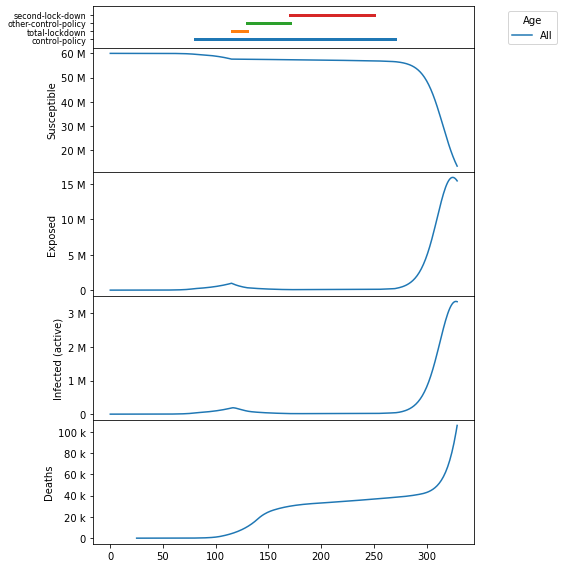

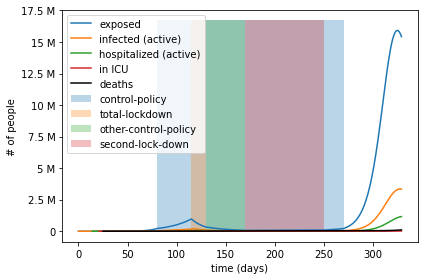

In [374]:
    # Visualize the results
    SEIR.visualize_seir_computation(
        results,
        compartments=kwargs['compartments'],
        restrictions_info=restr_info,
        show_individual_compartments=True)

In [375]:
output_file_format = 'csv'
output_file = r"C:\Users\MORPH\DataSciCov\model_configs\Italy2.csv"

In [376]:
data_series = pd.date_range(start = '2020-01-07',periods = 330)
data_series_frame = pd.DataFrame(data_series)
data_series_frame = data_series_frame.rename(columns = {0:'date'}) 
results = pd.concat([results, data_series_frame], axis=1, join='outer')

In [377]:
results

,time,"(susceptible, All)",susceptible,"(exposed, All)",exposed,"(infected (active), All)",infected (active),"(infected (total), All)",infected (total),"(removed, All)",removed,"(hospitalized (active), All)",hospitalized (active),"(in ICU, All)",in ICU,"(deaths, All)",deaths,date
0,0.0,5.999997e+07,5.999997e+07,3.000000e+01,3.000000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-07
1,1.0,5.999997e+07,5.999997e+07,2.997669e+01,2.997669e+01,2.529114e+00,2.529114e+00,3.142025e+00,3.142025e+00,6.023209e-01,6.023209e-01,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-08
2,2.0,5.999996e+07,5.999996e+07,3.143578e+01,3.143578e+01,3.673656e+00,3.673656e+00,5.335327e+00,5.335327e+00,1.643777e+00,1.643777e+00,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-09
3,3.0,5.999996e+07,5.999996e+07,3.395563e+01,3.395563e+01,4.617940e+00,4.617940e+00,7.670735e+00,7.670735e+00,3.029429e+00,3.029429e+00,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-10
4,4.0,5.999995e+07,5.999995e+07,3.730709e+01,3.730709e+01,5.475076e+00,5.475076e+00,1.021583e+01,1.021583e+01,4.712871e+00,4.712871e+00,NaN,NaN,NaN,NaN,NaN,NaN,2020-01-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,325.0,1.748581e+07,1.748581e+07,1.591664e+07,1.591664e+07,3.306648e+06,3.306648e+06,2.659787e+07,2.659787e+07,2.329089e+07,2.329089e+07,1.080497e+06,1.080497e+06,16012.131562,16012.131562,85003.121054,85003.121054,2020-11-27
326,326.0,1.639206e+07,1.639206e+07,1.587465e+07,1.587465e+07,3.335094e+06,3.335094e+06,2.773327e+07,2.773327e+07,2.439820e+07,2.439820e+07,1.108267e+06,1.108267e+06,16798.054918,16798.054918,89633.350246,89633.350246,2020-11-28
327,327.0,1.536009e+07,1.536009e+07,1.577591e+07,1.577591e+07,3.351091e+06,3.351091e+06,2.886365e+07,2.886365e+07,2.551291e+07,2.551291e+07,1.130517e+06,1.130517e+06,17571.624327,17571.624327,94678.053809,94678.053809,2020-11-29
328,328.0,1.439033e+07,1.439033e+07,1.562394e+07,1.562394e+07,3.354830e+06,3.354830e+06,2.998507e+07,2.998507e+07,2.663090e+07,2.663090e+07,1.149186e+06,1.149186e+06,18324.957991,18324.957991,100162.608136,100162.608136,2020-11-30


In [378]:
results = results.set_index(['date'])

In [379]:
   # Save data
    if output_file_format == 'csv':
        output_file_local = output_file or os.path.basename(f'{config_file}.csv')
        results.to_csv(output_file)
    elif output_file_format == 'json':
        output_file_local = output_file or os.path.basename(f'{config_file}.json')
        results.to_json(output_file)

# Testing on Australia

For aus, we simulate the infection start from Feb 1, due to we don't know the exact infection hypothesis in January that stands solid background.

The simulation assume in Feb 1, there are multiple infections from China, European,and USA travel to the Australia, and have 25 expose people each. We here take the acount of 15 infections.

Clear evidence show Australia lock down the country from March 20, many state give strengthen control from March 30, and by announceing the pandemic reaching its turn point in April 20, Australia government low down the level of control and release it during May 11 to June 11, depend on each state.

However the pendemic raizing the second wave since July, thus new policy control been emergently announce since August 2 in VIC, and soon some other state.

Based on these material, Australia policy restriction simulation will be divided into two section.

https://medium.com/@deborahalupton/timeline-of-covid-19-in-australia-1f7df6ca5f23

In [77]:
path = r"C:\Users\MORPH\DataSciCov\model_configs\Aus.txt"

In [78]:

    kwargs, initial_state_kwargs, sim_kwargs, restr_info = SEIR.parse_config_ini(path)

    model = SEIR.SEIR(**kwargs)

    # Setup initial state
    model.set_initial_state(**initial_state_kwargs)

    # Simulate up to 200 days
    model.simulate(**sim_kwargs)

    # Evaluate the solution
    time = np.arange(0, sim_kwargs['max_simulation_time'], 1, dtype=int)
    results = model.evaluate_solution(time)

 

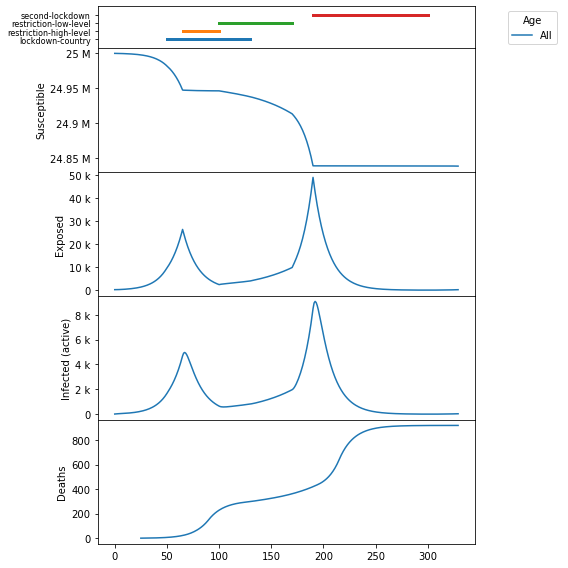

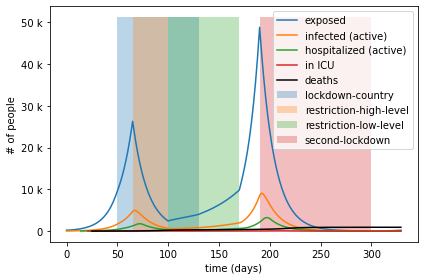

In [79]:
    # Visualize the results
    SEIR.visualize_seir_computation(
        results,
        compartments=kwargs['compartments'],
        restrictions_info=restr_info,
        show_individual_compartments=True)

In [80]:
output_file_format = 'csv'
output_file = r"C:\Users\MORPH\DataSciCov\model_configs\Aus.csv"

In [81]:
data_series = pd.date_range(start = '2020-02-01',periods = 330)
data_series_frame = pd.DataFrame(data_series)
data_series_frame = data_series_frame.rename(columns = {0:'date'}) 
results = pd.concat([results, data_series_frame], axis=1, join='outer')

In [82]:
results

,time,"(susceptible, All)",susceptible,"(exposed, All)",exposed,"(infected (active), All)",infected (active),"(infected (total), All)",infected (total),"(removed, All)",removed,"(hospitalized (active), All)",hospitalized (active),"(in ICU, All)",in ICU,"(deaths, All)",deaths,date
0,0.0,2.499976e+07,2.499976e+07,225.000000,225.000000,15.000000,15.000000,15.000000,15.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-01
1,1.0,2.499974e+07,2.499974e+07,226.231139,226.231139,24.414121,24.414121,31.115398,31.115398,6.653395,6.653395,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-02
2,2.0,2.499972e+07,2.499972e+07,234.162269,234.162269,31.461884,31.461884,47.558020,47.558020,16.015367,16.015367,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03
3,3.0,2.499969e+07,2.499969e+07,246.812435,246.812435,37.152454,37.152454,64.735688,64.735688,27.478548,27.478548,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-04
4,4.0,2.499965e+07,2.499965e+07,263.008371,263.008371,42.116430,42.116430,82.943573,82.943573,40.703776,40.703776,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,325.0,2.483860e+07,2.483860e+07,153.900586,153.900586,26.720388,26.720388,161297.356485,161297.356485,161220.894832,161220.894832,6.764499,6.764499,0.079770,0.079770,918.622959,918.622959,2020-12-22
326,326.0,2.483857e+07,2.483857e+07,166.397312,166.397312,28.890085,28.890085,161308.795695,161308.795695,161230.158539,161230.158539,7.313806,7.313806,0.085334,0.085334,918.631275,918.631275,2020-12-23
327,327.0,2.483855e+07,2.483855e+07,179.908747,179.908747,31.235960,31.235960,161321.163769,161321.163769,161240.174460,161240.174460,7.801770,7.801770,0.091357,0.091357,918.640698,918.640698,2020-12-24
328,328.0,2.483852e+07,2.483852e+07,194.517282,194.517282,33.772317,33.772317,161334.536127,161334.536127,161251.003673,161251.003673,8.329351,8.329351,0.097872,0.097872,918.651160,918.651160,2020-12-25


In [83]:
results = results.set_index(['date'])

In [84]:
   # Save data
    if output_file_format == 'csv':
        output_file_local = output_file or os.path.basename(f'{config_file}.csv')
        results.to_csv(output_file)
    elif output_file_format == 'json':
        output_file_local = output_file or os.path.basename(f'{config_file}.json')
        results.to_json(output_file)

### if we don't lock down second time

In [85]:
path = r"C:\Users\MORPH\DataSciCov\model_configs\Aus2.txt"

In [86]:

    kwargs, initial_state_kwargs, sim_kwargs, restr_info = SEIR.parse_config_ini(path)

    model = SEIR.SEIR(**kwargs)

    # Setup initial state
    model.set_initial_state(**initial_state_kwargs)

    # Simulate up to 200 days
    model.simulate(**sim_kwargs)

    # Evaluate the solution
    time = np.arange(0, sim_kwargs['max_simulation_time'], 1, dtype=int)
    results = model.evaluate_solution(time)

 

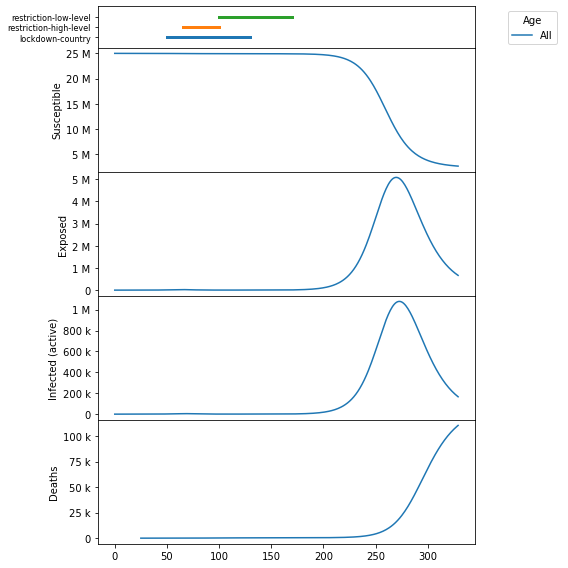

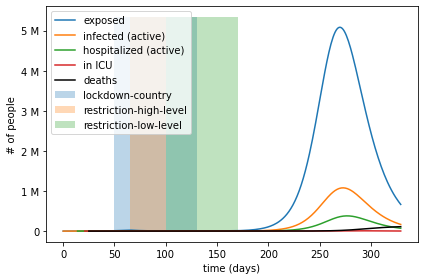

In [87]:
    # Visualize the results
    SEIR.visualize_seir_computation(
        results,
        compartments=kwargs['compartments'],
        restrictions_info=restr_info,
        show_individual_compartments=True)

In [88]:
output_file_format = 'csv'
output_file = r"C:\Users\MORPH\DataSciCov\model_configs\Aus2.csv"

In [89]:
data_series = pd.date_range(start = '2020-02-01',periods = 330)
data_series_frame = pd.DataFrame(data_series)
data_series_frame = data_series_frame.rename(columns = {0:'date'}) 
results = pd.concat([results, data_series_frame], axis=1, join='outer')

In [90]:
results

,time,"(susceptible, All)",susceptible,"(exposed, All)",exposed,"(infected (active), All)",infected (active),"(infected (total), All)",infected (total),"(removed, All)",removed,"(hospitalized (active), All)",hospitalized (active),"(in ICU, All)",in ICU,"(deaths, All)",deaths,date
0,0.0,2.499976e+07,2.499976e+07,225.000000,225.000000,15.000000,15.000000,1.500000e+01,1.500000e+01,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-01
1,1.0,2.499974e+07,2.499974e+07,226.231139,226.231139,24.414121,24.414121,3.111540e+01,3.111540e+01,6.653395e+00,6.653395e+00,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-02
2,2.0,2.499972e+07,2.499972e+07,234.162269,234.162269,31.461884,31.461884,4.755802e+01,4.755802e+01,1.601537e+01,1.601537e+01,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-03
3,3.0,2.499969e+07,2.499969e+07,246.812435,246.812435,37.152454,37.152454,6.473569e+01,6.473569e+01,2.747855e+01,2.747855e+01,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-04
4,4.0,2.499965e+07,2.499965e+07,263.008371,263.008371,42.116430,42.116430,8.294357e+01,8.294357e+01,4.070378e+01,4.070378e+01,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,325.0,2.758904e+06,2.758904e+06,805856.098097,805856.098097,200980.548744,200980.548744,2.143502e+07,2.143502e+07,2.123426e+07,2.123426e+07,84293.964231,84293.964231,2441.810833,2441.810833,106882.784297,106882.784297,2020-12-22
326,326.0,2.740190e+06,2.740190e+06,768357.887937,768357.887937,191748.728878,191748.728878,2.149125e+07,2.149125e+07,2.129970e+07,2.129970e+07,80476.712311,80476.712311,2345.558877,2345.558877,107860.771680,107860.771680,2020-12-23
327,327.0,2.722456e+06,2.722456e+06,732499.699599,732499.699599,182908.961573,182908.961573,2.154485e+07,2.154485e+07,2.136214e+07,2.136214e+07,77274.695675,77274.695675,2252.741906,2252.741906,108800.215279,108800.215279,2020-12-24
328,328.0,2.705647e+06,2.705647e+06,698220.141606,698220.141606,174447.758638,174447.758638,2.159594e+07,2.159594e+07,2.142168e+07,2.142168e+07,74204.942905,74204.942905,2163.307098,2163.307098,109702.153762,109702.153762,2020-12-25


In [91]:
results = results.set_index(['date'])

In [92]:
   # Save data
    if output_file_format == 'csv':
        output_file_local = output_file or os.path.basename(f'{config_file}.csv')
        results.to_csv(output_file)
    elif output_file_format == 'json':
        output_file_local = output_file or os.path.basename(f'{config_file}.json')
        results.to_json(output_file)

We can have 1 million people get infected in two month. if no face mask, no policy restriction, no concern but just happy.

# Limitation

Alghouth SEIR model provides great insight, there still some limitation and improvement and further its functionality.

1. The R0 ratio is fixed number, but in actual work the R0 will change based on many reason. Currently we can only use restriction adds such penalty, but not change R0 as input directly.

2. The same as R0, death ratio can not change during simulation. When the hospital doesn't have sufficient equipment and officier, the death possibility of patient will be higher than normal. Also when this pandemic spread for sometime, doctor and healthcare worker are getting more epxerienced which may reduce the death ratio during treatment. All above is not implemented in current SEIR model